# N-D Gauss-Blobs

In [ ]:
# Import necessary libraries
import sys
sys.path.extend(["../../"])
from src.para_voro import *
from src.para_voro_plots import *

# Create a sample dataset with 10 samples
np.random.seed(0)

In [2]:
dim = 6
n_blobs = 8

n_elements_per_blob = 15

blob_centers = n_blobs * np.random.random((n_blobs, dim))
blob_scaling = 0.2 + np.random.random((n_blobs, ))

blobs = blob_scaling.reshape(n_blobs, 1, 1) * np.random.randn(n_blobs * n_elements_per_blob * dim).reshape(n_blobs, n_elements_per_blob, dim) + blob_centers.reshape(n_blobs, 1, dim)

In [3]:
if dim == 2:
    plt.close()
    fig = plt.figure()
    ax = fig.gca()

    for i in range(n_blobs):
        ax.scatter(blobs[i, :, 0], blobs[i, :, 1])
    plt.show()

In [4]:
samples = blobs.reshape(-1, dim)
labels = np.concatenate([[i] * n_elements_per_blob for i in range(n_blobs)])

In [5]:
vor = Voronoi(samples)

In [6]:
aabbox = np.array([samples.min(0), samples.max(0)]).T

In [7]:
if dim <= 3:
    ax = plot_data(samples, labels, clip_box=aabbox)

In [8]:
bandwidths = np.array([0.5] * dim)

In [9]:
print("compute ridge vertices")
assert len(bandwidths) == len(aabbox) == dim
cch = False

ridge_vertices = generate_geometric_segment_boundaries_via_voronoi(samples=samples, labels=labels, clip_bbox=aabbox, clip_convex_hull=cch, vor=vor, verbose=False)
# ridge_vertices = make_object_array([np.array([[0.25, 0.0], [0.25, 0.5]]),
#                                     np.array([[0.0, 0.25], [0.5, 0.25]])], dtype=object)
print("plot relevant ridges")
if dim <= 3:
    plot_ridges(ridge_vertices, samples=samples, labels=labels, clip_box=aabbox, clip_convex_hull=cch)

compute ridge vertices


c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\../..\src\para_voro.py:308: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 1, 'C', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  d = np.dot(points[i], ridge_halfspace_definition[:-1]) + ridge_halfspace_definition[-1]


plot relevant ridges


compute sample points and sensitivities


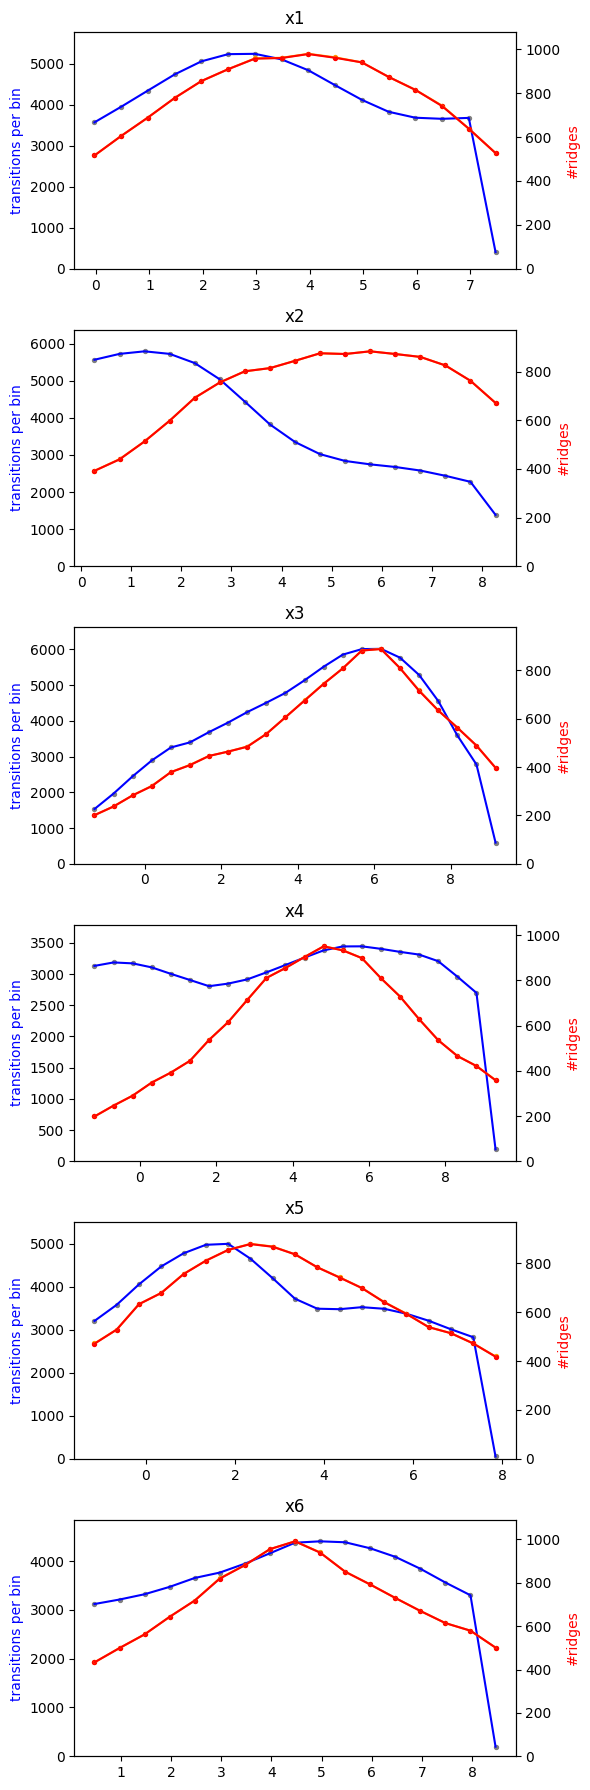

In [10]:
print("compute sample points and sensitivities")
sample_points, sensitivities, n_ridges = ridge_based_para_sense(ridge_vertices=ridge_vertices, bandwidths=bandwidths, clip_box=aabbox, return_n_ridges=True, verbose=False)
plot_sensitivities(sample_points, sensitivities, n_ridges=n_ridges)

# Second Example

In [11]:
np.random.seed(0)
dim = 5

n_elements_per_blob = 15

blob_centers = np.array([
    [0.0, -5.0, 0.0, 0.0, 0.0],
    [5.0, 0.0, 0.0, 0.0, 0.0],
    [10.0,5.0, 0.0, 0.0, 0.0],
    [15.0,0.0, 0.0, 0.0, 0.0],
    [5.0, 5.0, 0.0, 0.0, 0.0],
    [5.0, 5.0, 0.0, 0.0, 0.0],
])
blob_scaling = np.array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]) + 0.0

n_blobs = blob_centers.shape[0]
blob_scaling = blob_scaling[:n_blobs]

blob_centers = blob_centers[:, :dim]

blobs = blob_scaling.reshape(n_blobs, 1, 1) * np.random.randn(n_blobs * n_elements_per_blob * dim).reshape(n_blobs, n_elements_per_blob, dim) + blob_centers.reshape(n_blobs, 1, dim)

In [12]:
samples = blobs.reshape(-1, dim)
labels = np.concatenate([[i] * n_elements_per_blob for i in [0, 1, 2, 3, 4, 5, 6, 7, 8][:n_blobs]])

In [13]:
aabbox = np.array([samples.min(0), samples.max(0)]).T
bandwidths = np.array([0.5] * dim)

In [14]:
if dim <= 3:
    ax = plot_data(samples, labels, clip_box=aabbox)

In [15]:
rv = generate_geometric_segment_boundaries_via_voronoi(samples, labels, aabbox, False, verbose=False)

In [16]:
if dim <= 3:
    plot_ridges(rv, samples, labels, aabbox)

In [17]:
sp, sens, n_rid = ridge_based_para_sense(rv, bandwidths, aabbox, return_n_ridges=True, verbose=False)

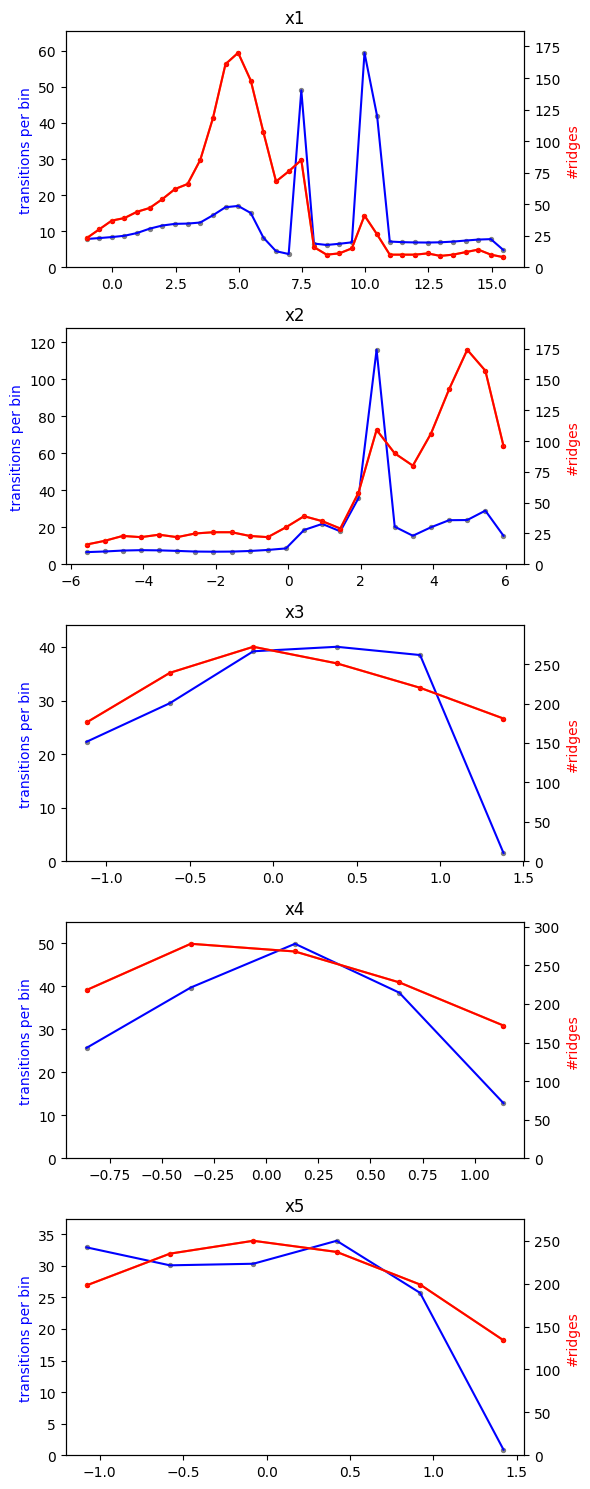

In [18]:
plot_sensitivities(sp, sens, n_ridges=n_rid)